In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

housesale_df = pd.read_csv("./datasets/kc_house_data.csv")

housesale_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
# get cols of features in dataset
housesale_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [10]:
# rem irerelvan cols
housesale_df.drop({"id", "date", "zipcode"}, axis = 1, inplace = True)

housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [11]:
# gets current age of house and add to df and drop yr_built
housesale_df["age"] = 2020 - housesale_df["yr_built"]

housesale_df.drop("yr_built", axis = 1, inplace =True)

housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,65
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,69
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,87
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,55
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,-122.045,1800,7503,33


In [14]:
#converts year renovated values to cat value, i.e 1 is renoveted else 0
housesale_df["renovated"] = housesale_df["yr_renovated"].apply(lambda x: 1 if x > 0 else 0)
housesale_df.drop("yr_renovated", axis = 1, inplace =True)
housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,65,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,69,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,87,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,55,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,33,0


In [15]:
# saves preprocessed data
housesale_df.to_csv("./datasets/housesale_mine.csv", index = False)

In [16]:
housesale_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512,49.000324,0.042321
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950,29.375234,0.201324
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,5.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,23.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,45.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,69.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,120.000000,1.000000


Text(0, 0.5, 'Number of bathrooms per house')

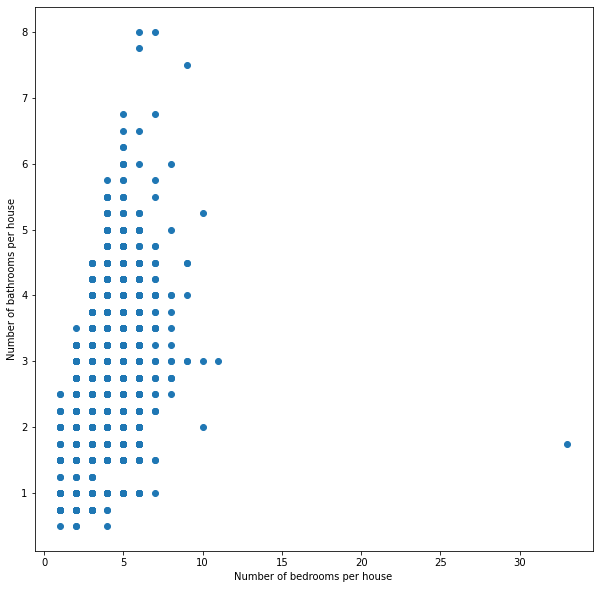

In [17]:
#data viz
fig, ax = plt.subplots(figsize = (10,10))

plt.scatter(housesale_df["bedrooms"], housesale_df["bathrooms"])
plt.xlabel("Number of bedrooms per house")
plt.ylabel("Number of bathrooms per house")

In [18]:
housesale_corr = housesale_df.corr()

housesale_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.306692,0.022036,0.585241,0.082845,-0.053953,0.126082
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,-0.009951,0.132054,0.393406,0.030690,-0.155670,0.018100
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.024280,0.224903,0.569884,0.088303,-0.507173,0.050064
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.052155,0.241214,0.756402,0.184342,-0.318152,0.055039
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,-0.085514,0.230227,0.144763,0.718204,-0.052946,0.007788
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.049239,0.125943,0.280102,-0.010722,-0.489193,0.006348
waterfront,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.014306,-0.041904,0.086507,0.030781,0.026153,0.093282
view,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,0.005871,-0.078107,0.280681,0.072904,0.053636,0.104095
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.015102,-0.105877,-0.093072,-0.003126,0.361592,-0.060309
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.113575,0.200341,0.713867,0.120981,-0.447865,0.013854


<AxesSubplot:>

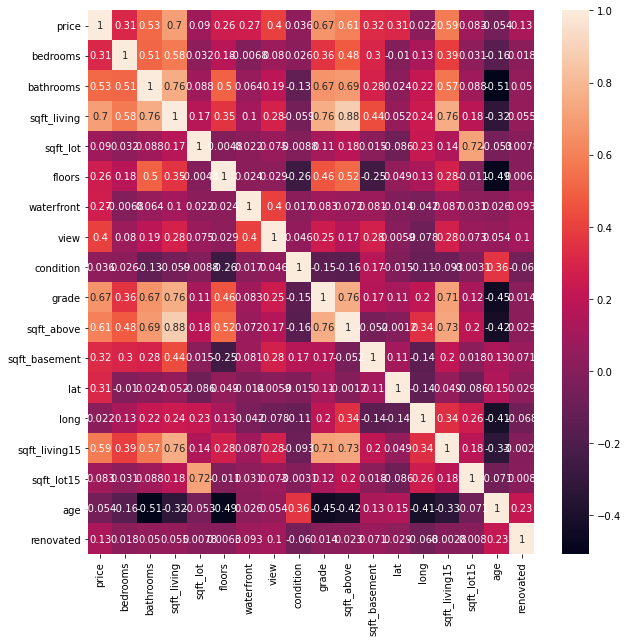

In [19]:
fig, axs = plt.subplots(figsize = (10, 10))
sns.heatmap(housesale_corr, annot=True)

In [20]:
# train a simple reg model with all features
from sklearn.model_selection import train_test_split

X = housesale_df.drop("price", axis = 1)
Y = housesale_df["price"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.linear_model import LinearRegression
reg_model = LinearRegression().fit(x_train, y_train)

print("Training score: ", reg_model.score(x_train, y_train))

Training score:  0.696972309863229


In [22]:
# views contrib of diff features to target
# -ve stuff drive down price while +ve drive up prices
predictors = x_train.columns
coef = pd.Series(reg_model.coef_, predictors).sort_values()

print(coef)

long            -121747.891713
bedrooms         -31589.129141
sqft_lot15           -0.434532
sqft_lot              0.168017
sqft_living15        26.913537
sqft_basement        35.505983
sqft_above           70.919100
sqft_living         106.425083
age                2460.317438
floors             4722.659556
condition         32975.522531
bathrooms         38579.805482
renovated         44594.855476
view              47676.618831
grade             98405.880528
lat              562514.050254
waterfront       631607.268498
dtype: float64


In [23]:
y_pred = reg_model.predict(x_test)

from sklearn.metrics import r2_score
print("Testing score: ", r2_score(y_test, y_pred))

Testing score:  0.6904394271535035


In [25]:
# linear reg analytically using stats api(doesn't use ml to do regression)
import statsmodels.api as sm

x_train_with_const = sm.add_constant(x_train)   # equi to setting fit intercept true to our model

model = sm.OLS(y_train, x_train_with_const)

result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2481.
Date:                Thu, 10 Dec 2020   Prob (F-statistic):               0.00
Time:                        13:32:57   Log-Likelihood:            -2.3548e+05
No. Observations:               17277   AIC:                         4.710e+05
Df Residuals:                   17260   BIC:                         4.711e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.249e+07    1.7e+06    -24.971